## This is to predict how much is someone's medical bill going to be, depending on their BMI, smoking habit, gender, number of children, and age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['font.size'] = 14

In [2]:
#importing the data
bill = pd.read_csv('insurance.csv')

In [3]:
#How the data looks like
bill.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#To add and to convert all object values on the table into numeric values, like what I did in the EDA
#Converting smoking habit, 1 as smoker, 0 as non smoker
condition =[(bill['smoker'] == 'yes'), (bill['smoker'] == 'no')]
values = [1,0]
bill['smoking_habit'] = np.select(condition, values)

#Converting BMI to classes as how the BMI Calculator does
condition =[(bill['bmi'] <= 18.5), (bill['bmi'] > 18.5) & (bill['bmi'] <= 24.99),
            (bill['bmi'] > 24.99) & (bill['bmi'] <= 29.99), (bill['bmi'] > 29.99) & (bill['bmi'] <= 34.99), 
            (bill['bmi'] > 34.99) & (bill['bmi'] <= 39.99),(bill['bmi'] > 39.99)]
values = [0,1,2,3,4,5]

bill['BMI_Classification'] = np.select(condition, values)
#As for the values:
#0: 'Underweight', 1:'Normal', 2:'Overweight', 
#3:'Class 1 Obese', 4:'Class 2 Obese', 5:'Morbid Obesity'

cost =[(bill['charges'] < 5000), (bill['charges'] >= 5000) & (bill['charges'] < 10000), 
       (bill['charges'] >= 10000) & (bill['charges'] < 20000),(bill['charges'] >= 20000)]
values = [0,1,2,3]
#As for the values: 0 is less than 5k, 1 is less than 10k, 2 is less than 20k, 3 is more than 20k

bill['cost_class'] = np.select(cost, values)

#agegroup =[(bill['age'] <25), (bill['age'] >= 25) & (bill['age'] < 35), (bill['age'] >= 35) & (bill['age'] < 45),
#           (bill['age'] >= 45) & (bill['age'] < 55), (bill['age'] >= 55) & (bill['age'] <= 65)]
#values = [0,1,2,3, 4]
#As for the values: 0 is younger 25, 1 is younger 35, 2 is younger 45, 3 is younger 55, 4 is 65 or younger

#bill['age_group'] = np.select(agegroup, values)

#Convert the 4 different part of the US into numerical value, NW as 0, NE as 1, SW as 2, SE as 3
#location = [(bill['region'] == 'northwest'),(bill['region'] == 'northeast'),
#            (bill['region'] == 'southwest'),(bill['region'] == 'southeast')]
#values = [0,1,2,3]

#bill['location'] = np.select(location, values)

#Convert the sexes value in to numeric value, 0 as female, 1 as male
#gender = [(bill['sex'] == 'female'),(bill['sex'] == 'male')]
#values = [0,1]
#bill['gender']=np.select(gender, values)

#I decided to remove gender, location as factors as their corrlation is merely 0.057, which is the least significant
#among all of the factors. I will also remove the number of children because hospital don't give discount depending
#on how many children the patients have, not even "returning customer" discount for pregnant women to give birth
#multiple times in their hospital. And I tried to put them in an age group, but the result didn't get any more
#accurate
bill.head()


,age,sex,bmi,children,smoker,region,charges,smoking_habit,BMI_Classification,cost_class
0,19,female,27.900,0,yes,southwest,16884.92400,1,2,2
1,18,male,33.770,1,no,southeast,1725.55230,0,3,0
2,28,male,33.000,3,no,southeast,4449.46200,0,3,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,3
4,32,male,28.880,0,no,northwest,3866.85520,0,2,0


In [5]:
#I am using the KNN method from sklearn because the charges can basically classified as 3 blobs in the scatter plot
#And importing whatever is needed for later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.dummy import DummyRegressor

In [6]:
#setting up the feature columns and the predicting result
feature_cols = ['smoking_habit', 'age','BMI_Classification']
X = bill[feature_cols]
y= bill.cost_class
#Split X and y into training and testing sets with the random state of 1338, and the train the model with the 
#nearest neighter as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1338)

In [7]:
#Make a dummy out of this, a dummy regressor and to train it to fit the model
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)

DummyRegressor()

In [8]:
#Save Predictions, and the the MSE and the RMSE
y_pred_dummy = dummy_mean.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred_dummy))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dummy)))

1.2289432145521144
1.1085771125871733


In [9]:
#See how's the linear regression model going to fit, and it turned out we can't draw one line to fit all of the 
#dots on the scatter plot
from sklearn.linear_model import LinearRegression
# Instantiate the model.
lr = LinearRegression()
# Train the model on the entire data set.
lr.fit(X, y)
# Predict the response values for the observations in X ("test the model").
lr.predict(X)

array([1.94539474, 0.189847  , 0.59991032, ..., 0.23335539, 0.26935762,
       3.66766068])

In [10]:
y_pred = lr.predict(X)

In [11]:
X.shape

(1338, 3)

In [12]:
y.shape

(1338,)

In [13]:
# list of integers 1 to 99
k_range = range(1, 100)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of  
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    #in the featured columns, cv=3 because the past error told me so
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7212257100149477, 0.7286995515695067, 0.7473841554559043, 0.7055306427503737, 0.7242152466367712, 0.7092675635276532, 0.7279521674140508, 0.710762331838565, 0.7092675635276532, 0.7085201793721972, 0.7130044843049328, 0.7130044843049327, 0.7010463378176383, 0.6935724962630792, 0.6988041853512706, 0.6890881913303438, 0.6868460388639761, 0.6808669656203289, 0.6808669656203289, 0.6741405082212256, 0.6704035874439462, 0.6629297458893871, 0.6636771300448431, 0.6614349775784754, 0.665171898355755, 0.6636771300448431, 0.6599402092675636, 0.6606875934230194, 0.6606875934230194, 0.6562032884902841, 0.6576980568011958, 0.6562032884902841, 0.6576980568011958, 0.6554559043348281, 0.6562032884902841, 0.6554559043348281, 0.656203288490284, 0.656203288490284, 0.656203288490284, 0.6562032884902841, 0.656203288490284, 0.6554559043348281, 0.6562032884902841, 0.6576980568011958, 0.6554559043348281, 0.6554559043348281, 0.6562032884902841, 0.6562032884902841, 0.6584454409566517, 0.6584454409566517, 0.659

In [14]:
#calculating the nearest neighbor's quantitiy to 99 and now trying to fit the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=99)

In [15]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6805970149253732


In [16]:
# Store the predicted response values.
y_pred_class = knn.predict(X)

In [17]:
# Calculate predicted probabilities of class membership.
knn.predict_proba(X)

array([[0.67676768, 0.01010101, 0.16161616, 0.15151515],
       [0.73737374, 0.01010101, 0.1010101 , 0.15151515],
       [0.63636364, 0.08080808, 0.17171717, 0.11111111],
       ...,
       [0.72727273, 0.01010101, 0.09090909, 0.17171717],
       [0.7979798 , 0.        , 0.11111111, 0.09090909],
       [0.        , 0.        , 0.68686869, 0.31313131]])

In [18]:
#To get the scores for different k values
scores = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

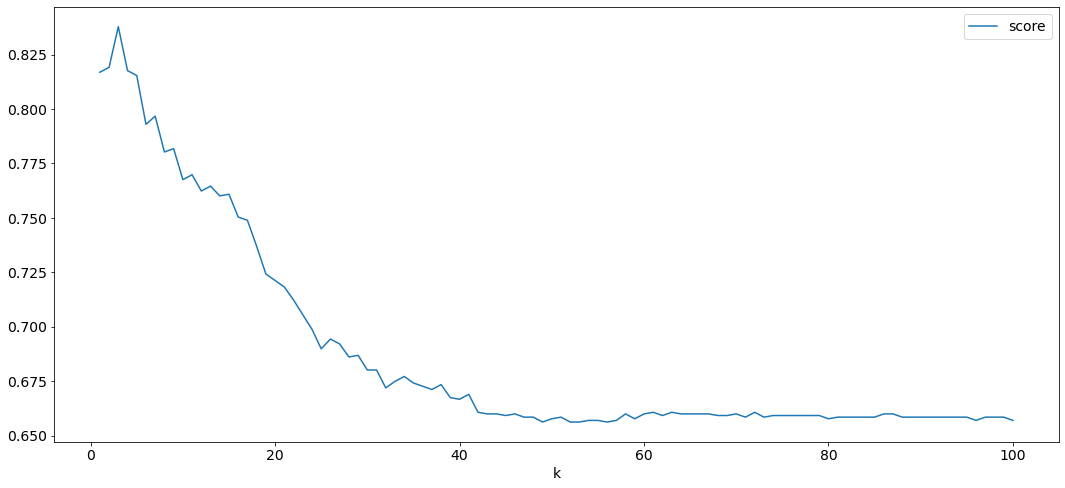

In [19]:
#It seems like as k increases, the less accurate it is 
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [20]:
#Calculate training and testing error for k=1 to 99, and collect them

k_range = list(range(1, 100))
training_error = []
testing_error = []

#Find test accuracy for all values of K between 1 to 99.
for k in k_range:

#Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
#Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
#Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [21]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,training error,testing error
K,,
1,0.189088,0.268657
2,0.198804,0.253731
3,0.194320,0.268657
4,0.209268,0.280597
5,0.213004,0.283582


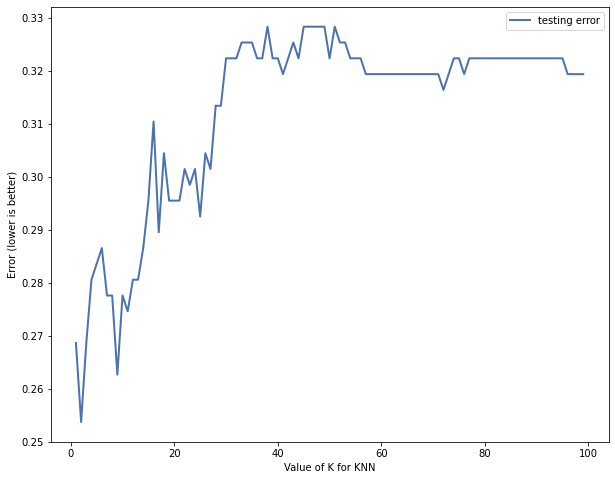

In [22]:
#Now plot the relation of k and its testing errors
df.plot(y='testing error', linewidth=2, figsize=(10, 8));
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [23]:
#The k value with the least testing_error, and when k = 2 are the lowest
df.sort_values('testing error').head()

,training error,testing error
K,,
2,0.198804,0.253731
9,0.235426,0.262687
1,0.189088,0.268657
3,0.194320,0.268657
11,0.245889,0.274627


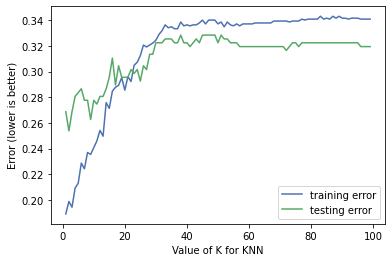

In [24]:
#plot out the training and testing errors
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [25]:
# Now use the best known number of neighbor as knn
knn = KNeighborsClassifier(n_neighbors=2)

# Re-train the model with X and y
knn.fit(X, y)

# Make a prediction for an out-of-sample observation. 
#The numbers of the array represent 'smoking_habit', 'age', 'BMI_Classification'

#As for the 1st values: 0 means non-smoker, 1 means smoker
#2nd value is the age, range from 18 to 65

#As for the 3rd values:
#0: 'Underweight', 1:'Normal', 2:'Overweight', 
#3:'Class 1 Obese', 4:'Class 2 Obese', 5:'Morbid Obesity'

#As for the result value: 0 is less than 5k, 1 is less than 10k, 2 is less than 20k, 3 is more than 20k

#
#See how much is a 22 years old non-smoker with a normal BMI going to pay 
#for a hospital visit
print(knn.predict(np.array([0,22,1]).reshape(1, -1)))
print(np.amax(knn.predict_proba([[0,22,1]])))
#result is less than 5k

[0]
1.0


In [30]:
#What about 27 years old smoker, with the BMI of class 2 obesity
print(knn.predict(np.array([1,27,4]).reshape(1, -1)))
print(np.amax(knn.predict_proba([[1,27,4]])))
#result if more than 20k

[3]
1.0


In [31]:
#What about 65 years old non-smoker, with the BMI of overweight, with 1 child
print(knn.predict(np.array([0,65,2]).reshape(1, -1)))
print(np.amax(knn.predict_proba([[0,65,2]])))
#Result is between 10k to 20k

[2]
1.0


In [32]:
#What about 46 years old SE female, smoker, with the BMI of class 1, with no child
print(knn.predict(np.array([1,46,0]).reshape(1, -1)))
print(np.amax(knn.predict_proba([[1,46,0]])))
#Result is between 5k to 10k

[1]
0.5


In [33]:
#How much am I going to pay
print(knn.predict(np.array([0,28,2]).reshape(1, -1)))
print(np.amax(knn.predict_proba([[0,28,2]])))
#I am going to pay less than 5k

[0]
1.0


In [34]:
#Now doing it with GridSearchCV

In [35]:
# instantiate model, with knn=2 from the past model
knn = KNeighborsClassifier(n_neighbors=2)

# Capture our cross validation scores
scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
print(scores)

[0.7309417  0.73542601 0.71973094]


In [36]:
#calculate the mean to give us an estimate of out-of-sample accuracy
print(scores.mean())

0.7286995515695067


In [37]:
#List of integers 1 to 19
k_range = range(1, 20)
#List of scores from k_range
k_scores = []
#We will loop through reasonable values of k
for k in k_range:
#Run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
#Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
#Append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7212257100149477, 0.7286995515695067, 0.7473841554559043, 0.7055306427503737, 0.7242152466367712, 0.7092675635276532, 0.7279521674140508, 0.710762331838565, 0.7092675635276532, 0.7085201793721972, 0.7130044843049328, 0.7130044843049327, 0.7010463378176383, 0.6935724962630792, 0.6988041853512706, 0.6890881913303438, 0.6868460388639761, 0.6808669656203289, 0.6808669656203289]


In [38]:
#k_scores by different k_values from 1 to 19
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.7212257100149477,
 2: 0.7286995515695067,
 3: 0.7473841554559043,
 4: 0.7055306427503737,
 5: 0.7242152466367712,
 6: 0.7092675635276532,
 7: 0.7279521674140508,
 8: 0.710762331838565,
 9: 0.7092675635276532,
 10: 0.7085201793721972,
 11: 0.7130044843049328,
 12: 0.7130044843049327,
 13: 0.7010463378176383,
 14: 0.6935724962630792,
 15: 0.6988041853512706,
 16: 0.6890881913303438,
 17: 0.6868460388639761,
 18: 0.6808669656203289,
 19: 0.6808669656203289}

In [43]:
#the k that gave us our highest score is
max(k_dict, key= k_dict.get)
#maybe I should set the k score as 3 when predicting

3

In [44]:
param_grid=dict(n_neighbors=list(k_range))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [45]:
# instantiate a GridSearch object - here a classifier (clf)
clf = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)

In [46]:
clf.fit(X,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             return_train_score=True, scoring='accuracy')

In [47]:
# Slice by the key/value pairs, seems like 4 is the best knn value
knn_score=list(zip(clf.cv_results_['mean_test_score'],clf.cv_results_['params']))

sorted(knn_score,key=lambda x: x[0],reverse=True)[0]

(0.7473841554559043, {'n_neighbors': 3})

In [48]:
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.7473841554559043
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [49]:
#instantiate model with best parameters of knn=3, and fit it
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#Now predict the persona I created earlier. Again, it is [smoker status, age, BMI level]

print(knn.predict([[0,22,1]]))
print(knn.predict([[1,27,4]]))
print(knn.predict([[0,65,2]]))
print(knn.predict([[1,46,0]]))
print(knn.predict([[0,28,2]]))

#The results are still the same

[0]
[3]
[2]
[1]
[0]
